In [70]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scipy
import statsmodels.api as sm
import seaborn as sns

In [2]:
data = pd.read_csv('data/house_prices/train.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Chọn biến
+ MSSubClass: Loại nhà ở.
+ MSZoning: Loại quy hoạch
+ LotFrontage: Khoảng cách ra tuyến đường gần nhất
+ LotArea: Diện tích nhà ở
+ Street: Loại đường tiếp cận nhà ở (đường nhựa hay đường sỏi).
+ Alley: Loại ngõ tiếp cận với bất động sản.
+ LotShape: Hình dạng của tài sản.
+ LandContour: Độ phẳng của bất động sản.
+ Utilities: Loại tiện ích có sẵn.
+ LotConfig: Đặc điểm lô đất (Lô trong, lô góc, ngõ cụt...)
+ LandSlope: Độ dốc của bất động sản.
+ Neighborhood: Vị trí thực tế trong giới hạn thành phố.
+ Condition1: Vị trí của lô đất nằm gần những điều kiện nào.
+ Condition2: Gần các điều kiện khác nhau 2.
+ BldgType: Loại nhà ở.
+ HouseStyle: Phong cách của nhà ở.
+ OverallQual: Đánh giá vật liệu và mức độ hoàn thiện của ngôi nhà.
+ OverallCond: Đánh giá tình trạng chung của ngôi nhà.
+ YearBuilt: ngày xây dựng ban đầu.
+ YearRemodAdd: Ngày tu sửa, giống với ngày xây dựng nếu như không có sự tu sửa gì.
+ RoofStyle: Loại mái nhà.
+ RoofMatl: Vật liệu mái nhà.
+ Exterior1st: Vật liệu bề mặt bên ngoài ngôi nhà.
+ Exterior2nd: Vật liệu bề mặt bao quanh ngôi nhà, nếu có 2 vật liệu trở lên.
+ MasVnrType: Loại vật liệu dùng để ốp tường bao quanh nhà.
+ MasVnrArea: Loại vật liệu dùng để ốp bao quanh khu vực ở.
+ ExterQual: Đánh giá tổng thể chất lượng vật liệu bên ngoài bao quanh nhà.
+ ExterCond: Đánh giá các điều kiện hiện tại của vật liệu bên ngoài.
+ Foundation: Loại vật liệu xây dựng.
+ BsmtQual: Đánh giá về chiều cao của tầng hầm.
+ BsmtCond: Đánh giá về điều kiện tổng thể của tầng hầm.
+ BsmtExposure: Đánh giá về lối đi bộ hoặc các mức độ của tường vườn.
+ BsmtFinType1: Đánh giá về diện tích hoàn thiện của tầng hầm.
+ BsmtFinSF1: Diện tích hoàn thiện loại 1.
+ BsmtFinType2: Đánh giá về diện tích hoàn thiện của tầng hầm.
+ BsmtFinSF2: Diện tích hoàn thiện loại 2.
+ BsmtUnfSF: Diện tích tầng hầm chưa hoàn thiện.
+ TotalBsmtSF: Tổng diện tích tầng hầm.
+ Heating: Loại nhiên liệu sưởi ấm.
+ HeatingQC: Đánh giá tổng thể về điều kiện và chất lượng sưởi ấm.
+ CentralAir: Điều hòa trung tâm.
+ Electrical: Hệ thống điện.
+ 1stFlrSF: Diện tích tầng 1.
+ 2ndFlrSF: Diện tích tầng 2.
+ LowQualFinSF: Diện tích hoàn thiện với chất lượng thấp.
+ GrLivArea: Diện tích đất ở.
+ BsmtFullBath: Số lượng tầng hầm có đầy đủ phòng tắm.
+ BsmtHalfBath: Diện tích tầng hầm có nửa phòng tắm??
+ FullBath: Số lượng phòng tắm đầy đủ.
+ HalfBath: Số lượng phòng tắm nửa??
+ Bedroom: Số lượng phòng ngủ (không bao gồm tầng hầm).
+ Kitchen: Số lượng căn bếp.
+ KitchenQual: Đánh giá chất lượng căn bếp.
+ TotRmsAbvGrd: Tổng số lượng phòng (không bao gồm phòng tắm).
+ Functional: Chức năng nhà ở.
+ Fireplaces: Số lượng lò sưởi.
+ FireplaceQu: Đánh giá chất lượng lò sưởi.
+ GarageType: Địa điểm gara đỗ xe.
+ GarageYrBlt: Năm xây gara.
+ GarageFinish: Đánh giá mức độ hoàn thiện gara.
+ GarageCars: Kích cỡ của gara - thể tích của nhà xe.
+ GarageArea: Diện tích của gara.
+ GarageQual: Chất lượng của gara.
+ GarageCond: Đánh giá điều kiện của gara.
+ PavedDrive: Đường lái xe trải nhựa.
+ WoodDeckSF: Diện tích sàn gỗ tính theo mét vuông.
+ OpenPorchSF: Diện tích hiên mở tính theo mét vuông.
+ EnclosedPorch: Diện tích hiên nhà đi kèm tính theo mét vuông.
+ 3SsnPorch: Diện tích hiên nhà ba mùa tính theo mét vuông.
+ ScreenPorch: Diện tích hiên nhà.
+ PoolArea: Diện tích hồ bơi.
+ PoolQC: Chất lượng bể bơi.
+ Fence: Chất lượng hàng rào.
+ MiscFeature: Tính năng khác không được đề cập.
+ MiscVal: Giá trị của tính năng khác (tiền).
+ MoSold: Tháng bán.
+ YrSold: Năm bán.
+ SaleType: Loại hình bán.
+ SaleCondition: Điều kiện bán

### Xử lý dữ liệu
+ Xử lý dữ liệu định lượng.
+ Xử lý dữ liệu định tính.

1. Lựa chọn biến độc lập định lượng đưa vào mô hình:
    + LotArea
    + WoodDeckSF
    + OpenPorchSF
    + 1stFlrSF
    + GrLivArea
2. Lựa chọn biến định tính đưa vào mô hình:
    + MSSubClass
    + MSZoning
    + Neighborhood
    + Bedroom

In [45]:
model_data = data[["SalePrice", "LotArea", "WoodDeckSF", "OpenPorchSF", 
                    "1stFlrSF", "GrLivArea", "MSSubClass", "MSZoning", "Neighborhood", "BedroomAbvGr" ]]

In [46]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SalePrice     1460 non-null   int64 
 1   LotArea       1460 non-null   int64 
 2   WoodDeckSF    1460 non-null   int64 
 3   OpenPorchSF   1460 non-null   int64 
 4   1stFlrSF      1460 non-null   int64 
 5   GrLivArea     1460 non-null   int64 
 6   MSSubClass    1460 non-null   int64 
 7   MSZoning      1460 non-null   object
 8   Neighborhood  1460 non-null   object
 9   BedroomAbvGr  1460 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 114.2+ KB


In [52]:
model_data_all = pd.get_dummies(model_data
                            , prefix=["MSSubClass", "MSZoning", "Neighborhood", "BedroomAbvGr"]
                            , columns=["MSSubClass", "MSZoning", "Neighborhood", "BedroomAbvGr"]
                            , drop_first=False
                           )


Y = model_data_all["SalePrice"]
X = model_data_all.loc[:, model_data_all.columns != "SalePrice"]

In [53]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=40)

In [54]:
X_test

,LotArea,WoodDeckSF,OpenPorchSF,1stFlrSF,GrLivArea,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,...,Neighborhood_Timber,Neighborhood_Veenker,BedroomAbvGr_0,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8
1258,9587,212,0,1166,1166,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1041,9130,0,40,800,1632,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1181,5587,162,53,1652,1652,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1108,8063,100,48,948,1690,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
554,10625,320,62,1006,2046,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,8712,68,0,859,1178,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1251,3136,148,36,1405,1405,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
379,8123,100,63,1007,1800,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
35,13418,113,32,1132,2452,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [55]:
reg = LinearRegression(fit_intercept = False)

In [56]:
reg.fit(X_train,Y_train)

LinearRegression(fit_intercept=False)

In [58]:
Y_pred = reg.predict(X_test)
print(reg.intercept_)
print(reg.coef_, 5)
n = len(X_test)
p = 1
r2 = metrics.r2_score(Y_test, Y_pred)
r2_adjusted = 1 - (1 - r2)*(n-1)/(n-p-1)
print(r2)
print(r2_adjusted)

0.0
[ 3.34236399e-01  3.86771366e+01  2.37185069e+01  7.53085899e+00
  8.07708616e+01  2.83318071e+04  5.98116431e+03 -3.80556075e+03
  1.47618773e+04  6.72286798e+02  1.34447300e+04  6.88267584e+02
  7.06822249e+03  2.36460195e+04  3.36642475e+04 -1.45960622e+04
 -1.13936484e+04 -2.60898817e+04  3.44380306e+03 -8.00590617e+03
 -2.74730224e+04  1.54865221e+04  2.69171171e+04  2.41391824e+04
  2.87415671e+04  2.64132016e+04  2.44057930e+03 -9.65142250e+03
 -2.62922221e+04 -1.15708339e+04  5.21360404e+03  2.71902822e+03
 -4.33451494e+04 -3.51588391e+03 -3.50293114e+04 -3.18519080e+04
 -1.82960011e+04 -3.01545862e+04  1.38427819e+04 -1.95853123e+04
  8.19927426e+04  9.66922510e+04 -4.73045555e+04 -4.37828784e+04
 -3.43252022e+04 -5.53806021e+03  4.41698183e+04  9.79309260e+04
  2.06627968e+04  3.59769637e+04  4.81402082e+04  3.65606834e+04
  1.63484272e+04  7.95739961e+03  5.20260294e+03 -3.49816041e+04
 -1.14163510e+04  0.00000000e+00] 5
0.7167045566118587
0.7157276757725892


### Thư viên Statsmodel

In [90]:
mod = sm.OLS(Y_train, X_train)
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     86.08
Date:                Tue, 27 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:50:00   Log-Likelihood:                -13910.
No. Observations:                1168   AIC:                         2.793e+04
Df Residuals:                    1114   BIC:                         2.820e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
LotArea                  0.3342 

In [91]:
Y_pred = res.predict(X_test)

<AxesSubplot: xlabel='SalePrice'>

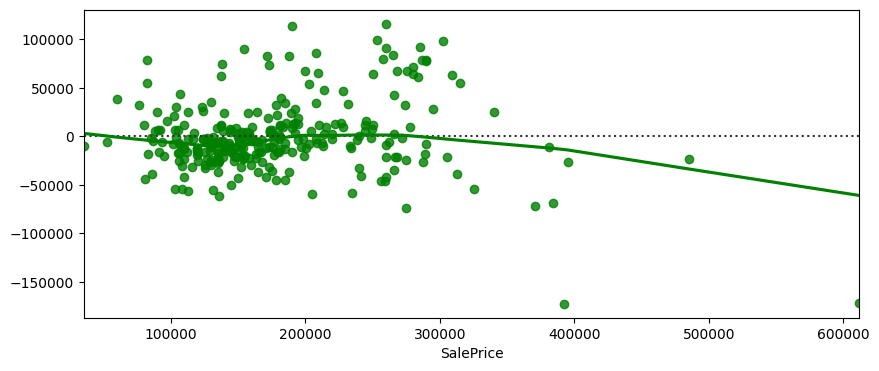

In [93]:
fig = plt.figure(figsize=(10, 4))

sns.residplot(x=Y_test, y=Y_pred, lowess=True, color="g")